# August 09 - Predicting energies

In [84]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch
from plot_utils import notebook_utils_2

In [85]:
# Label dict
label_dict = {0:"gamma", 1:"e", 2:"mu"}

## Plot the new model diagnostics

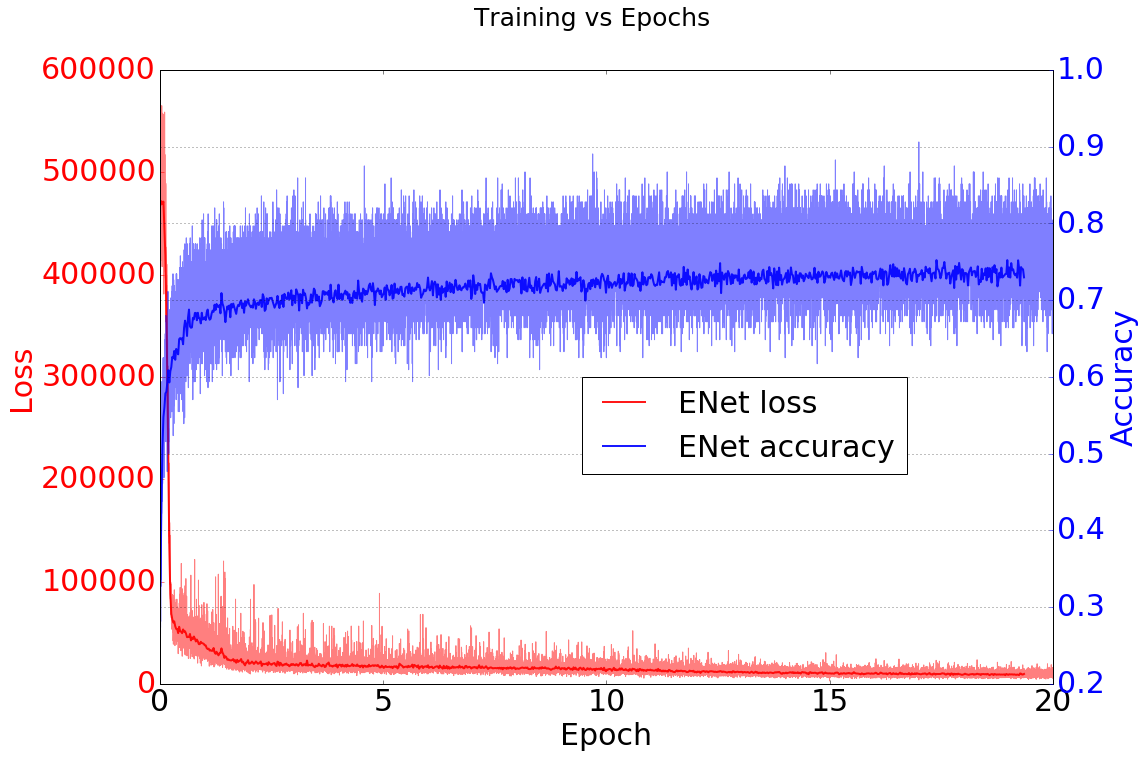

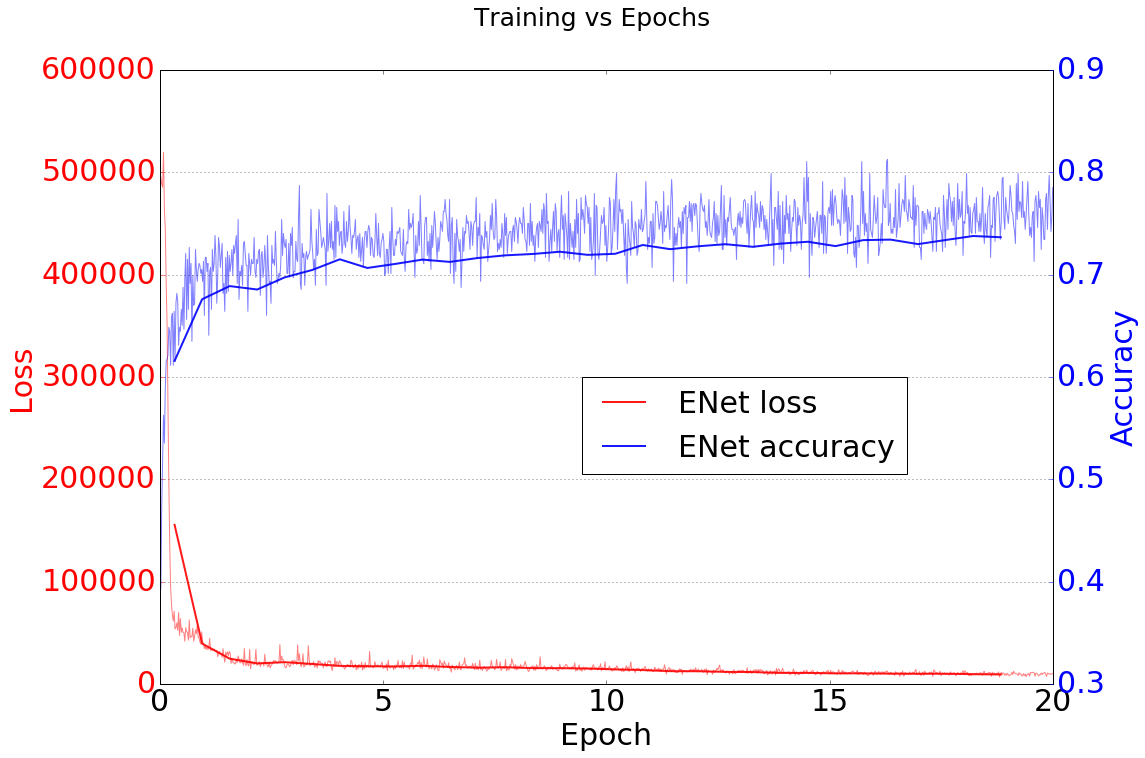

In [86]:
# Using the absolute path
run_id = "20190810_023748"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
training_log, val_log = dump_dir + "log_train.csv", dump_dir + "log_val.csv"

# Plot training log
plot_utils.plot_training([training_log], ["ENet"], 
                         {"ENet":["red", "blue"]},
                         downsample_interval=32, show_plot=True)

# Plot validation log
plot_utils.plot_training([val_log], ["ENet"], 
                         {"ENet":["red", "blue"]},
                         downsample_interval=32, show_plot=True)

In [87]:
np_arr = np.load(dump_dir + "iteration_" + str(28000) + ".npz")
print(list(np_arr.keys()))

['events', 'labels', 'energies', 'predicted_labels', 'softmax']


In [88]:
a = np_arr["events"]

In [89]:
print(np.sum(a[0]))

9283.281


In [90]:
run_id = "20190811_185702"

In [91]:
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
model_status = "trained"
np_arr_path = dump_dir + "samples/" + "ENet" + "/" + model_status + "_samples.npy"

In [92]:
np_arr = np.load(np_arr_path, allow_pickle=True)

In [93]:
print(np_arr.shape)

(64, 3)


In [94]:
print(np.sum(np_arr[0][0][0]))

1033.5273


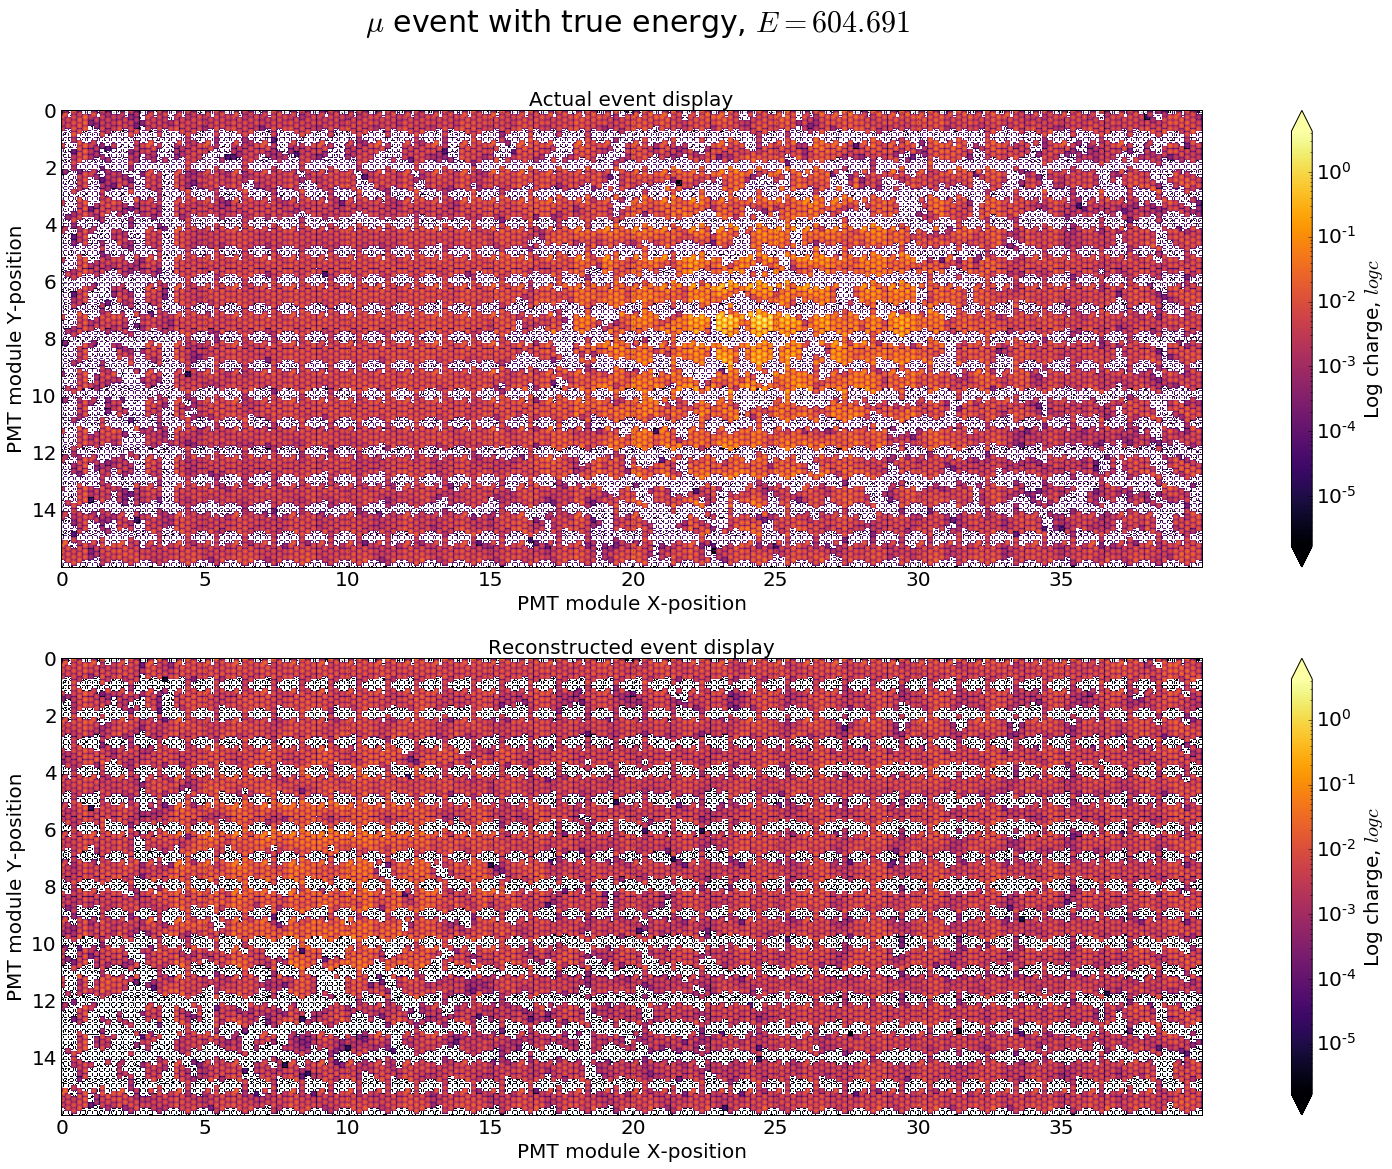

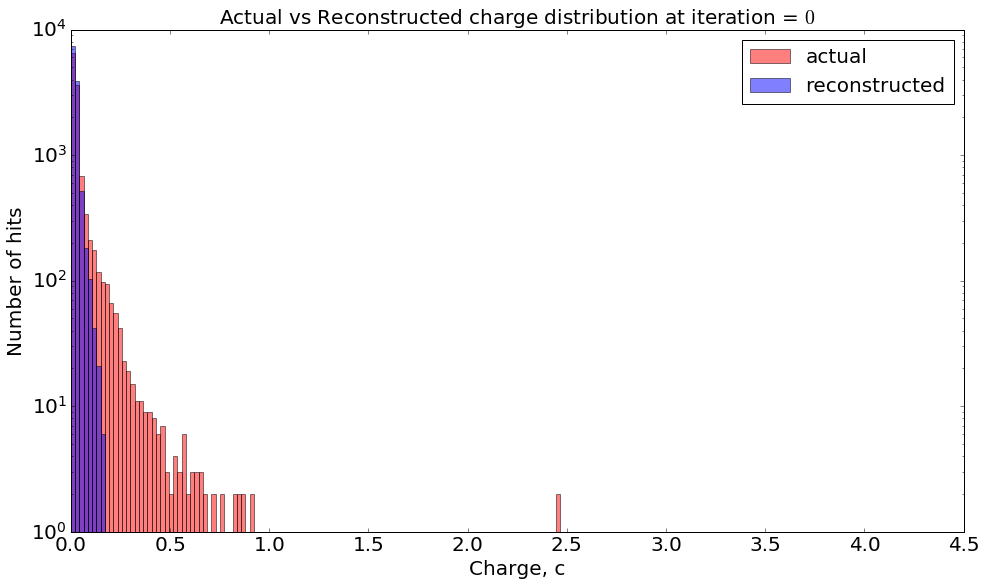

In [95]:
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
model_status = "trained" 
np_arr_path = dump_dir + "samples/" + "ENet" + "/" + model_status + "_samples.npy"

np_arr = np.load(np_arr_path, allow_pickle=True)
i, j = random.randint(0, np_arr.shape[0]-1), random.randint(0, np_arr.shape[0]-1)

plot_utils.plot_actual_vs_recon(np_arr[i][0][0], np_arr[j][0][0], 
                                label_dict[np_arr[i][1].item()], np_arr[i][2][0],
                                show_plot=True)

plot_utils.plot_charge_hist(np_arr[i][0][0],
                            np_arr[j][0][0], 0, num_bins=200)